## Smishing Detector

## Introduction

In today's digital age, where smartphones are an integral part of our lives, SMS (Short Message Service) has become a common means of communication. While SMS messages are often used for legitimate purposes, they can also be exploited for malicious activities, such as phishing. Smishing, a portmanteau of "SMS" and "phishing," is a form of cyberattack in which attackers use deceptive SMS messages to trick recipients into revealing sensitive information or clicking on malicious links.

The rise of smishing attacks has prompted the need for effective tools to detect and mitigate such threats. In this Jupyter Notebook, we will explore the development of a Smishing Detector, a machine learning-based solution designed to identify and flag potentially malicious SMS messages.

## Steps
1. Loading the data
2. Data cleaning
3. Familiarizing with data & EDA
4. Visualizing the data
5. Splitting the data
6. Training the data
7. Comparision of Model
8. Exporting of model

In [96]:
#Importing pandas and numpy
import numpy as np
import pandas as pd

## 1. IMPORTING AND VIEW OF THE DATA

In [97]:
dataset = pd.read_csv('smishing.csv')

In [98]:
#dataset.head()
#dataset.sample(5)
dataset.tail(15)

,LABEL,TEXT,URL,EMAIL,PHONE
6196,legit,Kd ndine lsaac ndibwera mochedwerapo ndikufuna...,No,No,yes
6197,legit,bwera uzatenge ndalama zako kuno galu iwe,No,No,yes
6198,legit,Trans ID: MP230928.1746.D02991. You have paid ...,No,No,yes
6199,smishing,Heloo. Deposit money into this account 2103404...,No,No,yes
6200,smishing,Big announcement! Mike Kashoti has won our £2...,No,No,yes
6201,legit,Get 30 FREE bonus minutes valid 72 Hrs by spen...,No,No,yes
6202,legit,"Dear Mr M PHIRI, Be reminded that your Motor ...",No,No,yes
6203,legit,Zabwino zonse! Mutha kukhala mmodzi mwa 7500 L...,No,No,yes
6204,legit,"Dear customer, you have received 4,300.00MWK f...",No,No,yes
6205,legit,Tiketi imodzi YAULELE ya MK500 ikudikila inu 8...,No,No,yes


In [99]:
dataset.shape

(6211, 5)

## 1.1. INSPECTION OF DATA

In [100]:
dataset.groupby('LABEL').describe()

TEXT                                                                 \
         count unique                                                top freq   
LABEL                                                                           
legit     4964   4942  Osavutika ndi Mizere!! Gwiritsani ntchito Airt...    4   
smishing  1247   1219  NDINE AGENT NDASILIDWA NDALAMA YOKWANA 21000 K...    8   

           URL                  EMAIL                  PHONE                    
         count unique top  freq count unique top  freq count unique  top  freq  
LABEL                                                                           
legit     4964      2  No  4956  4964      2  No  4963  4964      2   No  4869  
smishing  1247      2  No  1048  1247      2  No  1229  1247      2  yes   906

In [101]:
dataset.groupby('URL').describe()

LABEL                         TEXT         \
    count unique       top  freq count unique   
URL                                             
No   6004      2     legit  4956  6004   5956   
yes   207      2  smishing   199   207    205   

                                                            EMAIL             \
                                                   top freq count unique top   
URL                                                                            
No   NDINE AGENT NDASILIDWA NDALAMA YOKWANA 21000 K...    8  6004      2  No   
yes  FREE MESSAGE Activate your 500 FREE Text Messa...    2   207      2  No   

          PHONE                   
     freq count unique top  freq  
URL                               
No   5988  6004      2  No  5081  
yes   204   207      2  No   129

In [102]:
dataset.groupby('EMAIL').describe()

LABEL                         TEXT         \
      count unique       top  freq count unique   
EMAIL                                             
No     6192      2     legit  4963  6192   6141   
yes      19      2  smishing    18    19     19   

                                                                URL         \
                                                     top freq count unique   
EMAIL                                                                        
No     NDINE AGENT NDASILIDWA NDALAMA YOKWANA 21000 K...    8  6192      2   
yes    UR Mobile Number Won 2Crores 35Lakh Rupees In ...    1    19      2   

                PHONE                   
      top  freq count unique top  freq  
EMAIL                                   
No     No  5988  6192      2  No  5197  
yes    No    16    19      2  No    13

In [103]:
dataset.groupby('PHONE').describe()

LABEL                         TEXT         \
      count unique       top  freq count unique   
PHONE                                             
No     5210      2     legit  4869  5210   5197   
yes    1001      2  smishing   906  1001    966   

                                                                URL         \
                                                     top freq count unique   
PHONE                                                                        
No     The sign of maturity is not when we start sayi...    2  5210      2   
yes    NDINE AGENT NDASILIDWA NDALAMA YOKWANA 21000 K...    8  1001      2   

                EMAIL                   
      top  freq count unique top  freq  
PHONE                                   
No     No  5081  5210      2  No  5197  
yes    No   923  1001      2  No   995

## 2. DATA CLEANING
        Checking for missing values
        Checking for duplicate values
        Removing duplicates
        Droping unwanted columns
        Renaming columns
        Converting target values into numerical values

In [104]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6211 entries, 0 to 6210
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   LABEL   6211 non-null   object
 1   TEXT    6211 non-null   object
 2   URL     6211 non-null   object
 3   EMAIL   6211 non-null   object
 4   PHONE   6211 non-null   object
dtypes: object(5)
memory usage: 242.7+ KB


In [105]:
#Missing values
dataset.isnull().sum()

LABEL    0
TEXT     0
URL      0
EMAIL    0
PHONE    0
dtype: int64

In [106]:
# Check for duplicate values
dataset.duplicated().sum()

46

In [107]:
# Remove dulicates
dataset = dataset.drop_duplicates(keep = 'first')

In [108]:
dataset.duplicated().sum()

0

In [109]:
dataset.shape

(6165, 5)

In [110]:
# Drop last 3 columns
dataset.drop(columns = ['URL', 'EMAIL', 'PHONE'], inplace = True)

In [111]:
dataset

,LABEL,TEXT
0,legit,Your opinion about me? 1. Over 2. Jada 3. Kusr...
1,legit,What's up? Do you want me to come online? If y...
2,legit,So u workin overtime nigpun?
3,legit,"Also sir, i sent you an email about how to log..."
4,smishing,Please Stay At Home. To encourage the notion o...
...,...,...
6206,legit,"akasitomala mwawina mphoto, tiimbileni kt mumv..."
6207,legit,Bwelani pa room man tizakupaseni ndalama yanu
6208,legit,mubwere ku nyumba muzatenge ndalama zanu
6209,legit,mubwere ku nyumba muzatenge katundu wanu


In [112]:
dataset.tail(15)

,LABEL,TEXT
6196,legit,Kd ndine lsaac ndibwera mochedwerapo ndikufuna...
6197,legit,bwera uzatenge ndalama zako kuno galu iwe
6198,legit,Trans ID: MP230928.1746.D02991. You have paid ...
6199,smishing,Heloo. Deposit money into this account 2103404...
6200,smishing,Big announcement! Mike Kashoti has won our £2...
6201,legit,Get 30 FREE bonus minutes valid 72 Hrs by spen...
6202,legit,"Dear Mr M PHIRI, Be reminded that your Motor ..."
6203,legit,Zabwino zonse! Mutha kukhala mmodzi mwa 7500 L...
6204,legit,"Dear customer, you have received 4,300.00MWK f..."
6205,legit,Tiketi imodzi YAULELE ya MK500 ikudikila inu 8...


In [113]:
# Renaming the columns
dataset.rename(columns = {'LABEL' : 'target', 'TEXT' : 'message'}, inplace = True)

In [114]:
dataset

,target,message
0,legit,Your opinion about me? 1. Over 2. Jada 3. Kusr...
1,legit,What's up? Do you want me to come online? If y...
2,legit,So u workin overtime nigpun?
3,legit,"Also sir, i sent you an email about how to log..."
4,smishing,Please Stay At Home. To encourage the notion o...
...,...,...
6206,legit,"akasitomala mwawina mphoto, tiimbileni kt mumv..."
6207,legit,Bwelani pa room man tizakupaseni ndalama yanu
6208,legit,mubwere ku nyumba muzatenge ndalama zanu
6209,legit,mubwere ku nyumba muzatenge katundu wanu


In [115]:
#Converting the target into numerical values
#Label smishing message as 1; legit message as 0;

#We can use the two methods below to turn the target into numerical values

#dataset.loc[df['target'] == 'legit', 'target',] = 0
#dataset.loc[df['target'] == 'smishing', 'target',] = 1

from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [116]:
encoder.fit_transform(dataset['target'])

array([0, 0, 0, ..., 0, 0, 0])

In [117]:
dataset['target'] = encoder.fit_transform(dataset['target'])

In [118]:
dataset

,target,message
0,0,Your opinion about me? 1. Over 2. Jada 3. Kusr...
1,0,What's up? Do you want me to come online? If y...
2,0,So u workin overtime nigpun?
3,0,"Also sir, i sent you an email about how to log..."
4,1,Please Stay At Home. To encourage the notion o...
...,...,...
6206,0,"akasitomala mwawina mphoto, tiimbileni kt mumv..."
6207,0,Bwelani pa room man tizakupaseni ndalama yanu
6208,0,mubwere ku nyumba muzatenge ndalama zanu
6209,0,mubwere ku nyumba muzatenge katundu wanu


In [119]:
dataset.shape

(6165, 2)

## 3. EXPLORATORY DATA ANALYSIS

In [120]:
dataset['target'].value_counts()

0    4942
1    1223
Name: target, dtype: int64

([<matplotlib.patches.Wedge at 0x18360012280>,
 [Text(-0.8932018639632214, 0.6420205839477633, 'legit'),
  Text(0.893201803852912, -0.6420206675753549, 'smishing')],
 [Text(-0.4872010167072116, 0.3501930457896891, '80.16'),
  Text(0.4872009839197701, -0.350193091404739, '19.84')])

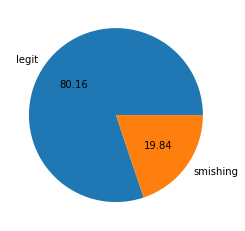

In [121]:
import matplotlib.pyplot as plt
plt.pie(dataset['target'].value_counts(), labels = ['legit', 'smishing'], autopct = "%0.2f")

In [122]:
import nltk

In [123]:
!pip install nltk

In [124]:
 nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\SIMEON.A.MATAKA\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [125]:
#Finding the length of texts
dataset['num_characters'] = dataset['message'].apply(len)

In [126]:
dataset.head()

,target,message,num_characters
0,0,Your opinion about me? 1. Over 2. Jada 3. Kusr...,136
1,0,What's up? Do you want me to come online? If y...,79
2,0,So u workin overtime nigpun?,28
3,0,"Also sir, i sent you an email about how to log...",173
4,1,Please Stay At Home. To encourage the notion o...,152


In [127]:
# num of words
dataset['num_of_words'] = dataset['message'].apply(lambda x:len(nltk.word_tokenize(x)))

In [128]:
dataset.head()

,target,message,num_characters,num_of_words
0,0,Your opinion about me? 1. Over 2. Jada 3. Kusr...,136,37
1,0,What's up? Do you want me to come online? If y...,79,20
2,0,So u workin overtime nigpun?,28,6
3,0,"Also sir, i sent you an email about how to log...",173,37
4,1,Please Stay At Home. To encourage the notion o...,152,27


In [129]:
#num of sentences
dataset['num_sentences'] = dataset['message'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [130]:
dataset.head()

,target,message,num_characters,num_of_words,num_sentences
0,0,Your opinion about me? 1. Over 2. Jada 3. Kusr...,136,37,11
1,0,What's up? Do you want me to come online? If y...,79,20,3
2,0,So u workin overtime nigpun?,28,6,1
3,0,"Also sir, i sent you an email about how to log...",173,37,3
4,1,Please Stay At Home. To encourage the notion o...,152,27,4


In [131]:
dataset[['num_characters', 'num_of_words','num_sentences']].describe()

,num_characters,num_of_words,num_sentences
count,6165.000000,6165.000000,6165.000000
mean,83.795296,18.945012,1.989294
std,58.599352,12.970280,1.428782
min,2.000000,1.000000,1.000000
25%,38.000000,9.000000,1.000000
50%,67.000000,16.000000,2.000000
75%,127.000000,27.000000,2.000000
max,910.000000,220.000000,38.000000


In [132]:
#legit
dataset[dataset['target'] == 0][['num_characters','num_of_words','num_sentences']].describe()

,num_characters,num_of_words,num_sentences
count,4942.000000,4942.000000,4942.000000
mean,71.379401,17.196884,1.826588
std,56.424745,13.408165,1.379468
min,2.000000,1.000000,1.000000
25%,34.000000,9.000000,1.000000
50%,53.000000,13.000000,1.000000
75%,92.750000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [133]:
#smishing
dataset[dataset['target'] == 1][['num_characters','num_of_words','num_sentences']].describe()

,num_characters,num_of_words,num_sentences
count,1223.000000,1223.000000,1223.000000
mean,133.966476,26.008994,2.646770
std,36.130805,7.704702,1.436434
min,18.000000,2.000000,1.000000
25%,117.000000,22.000000,2.000000
50%,143.000000,27.000000,2.000000
75%,156.000000,31.000000,3.000000
max,383.000000,75.000000,9.000000


## 3.1. GRAPHICAL REPRESENTATION

In [134]:
import seaborn as sns

<AxesSubplot:xlabel='num_characters', ylabel='Count'>

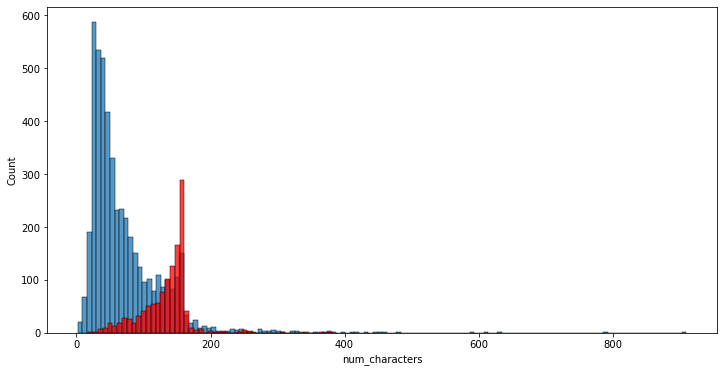

In [135]:
plt.figure(figsize=(12,6))
sns.histplot(dataset[dataset['target'] == 0]['num_characters'])
sns.histplot(dataset[dataset['target'] == 1]['num_characters'], color = 'red')

<AxesSubplot:xlabel='num_of_words', ylabel='Count'>

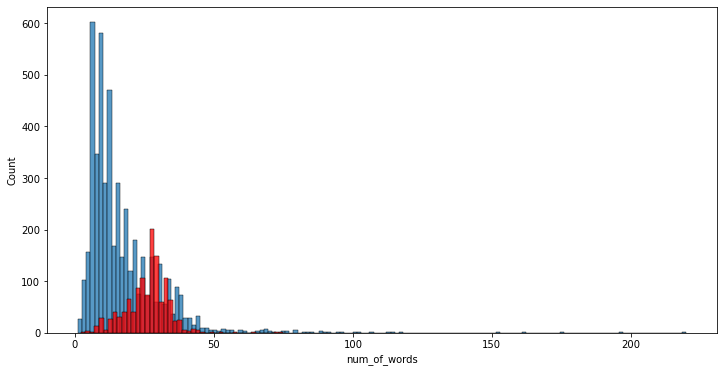

In [136]:
plt.figure(figsize=(12,6))
sns.histplot(dataset[dataset['target'] == 0]['num_of_words'])
sns.histplot(dataset[dataset['target'] == 1]['num_of_words'], color = 'red')

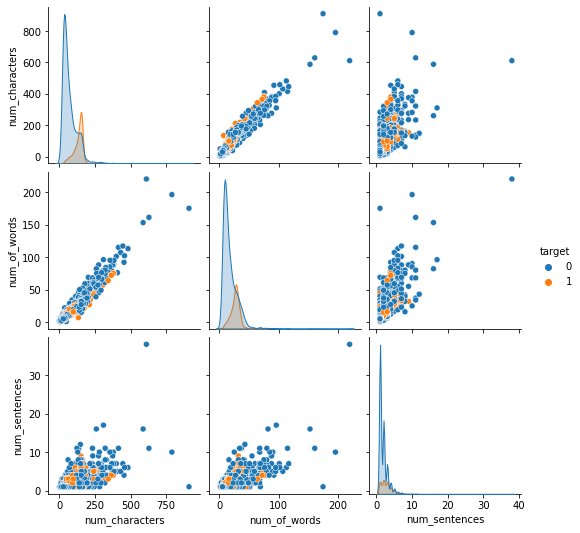

In [137]:
#comparing
sns.pairplot(dataset,hue='target')

<AxesSubplot:>

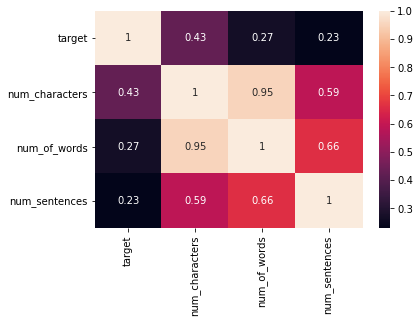

In [138]:
sns.heatmap(dataset.corr(), annot=True)

## 4. DATA PREPROCESSING
        Lower case
        Tokenization
        Removing special characters
        Removing stop words and punctuation
        Stemming

In [139]:
import nltk
!pip install nltk

In [140]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\SIMEON.A.MATAKA\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [141]:

from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords
import string
ps = PorterStemmer()

def transform_text(text):
    #Lowercase
    text = text.lower()
    
    #Tokenization
    text = nltk.word_tokenize(text)
    
    #alpha numerical values
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
            
    text = y[:]
    y.clear()
    
    #Removing stopwords
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
            
    text = y[:]
    y.clear()
    
    #Stemming
    for i in text:
        y.append(ps.stem(i))
    
    
    return " ".join(y)

In [142]:
dataset['transformed_messages'] = dataset['message'].apply(transform_text)

In [143]:
dataset

,target,message,num_characters,num_of_words,num_sentences,transformed_messages
0,0,Your opinion about me? 1. Over 2. Jada 3. Kusr...,136,37,11,opinion jada kusruthi lovabl silent spl charac...
1,0,What's up? Do you want me to come online? If y...,79,20,3,want come onlin free talk
2,0,So u workin overtime nigpun?,28,6,1,u workin overtim nigpun
3,0,"Also sir, i sent you an email about how to log...",173,37,3,also sir sent email log usc payment portal sen...
4,1,Please Stay At Home. To encourage the notion o...,152,27,4,pleas stay home encourag notion stay home citi...
...,...,...,...,...,...,...
6206,0,"akasitomala mwawina mphoto, tiimbileni kt mumv...",55,8,1,akasitomala mwawina mphoto tiimbileni kt mumv ...
6207,0,Bwelani pa room man tizakupaseni ndalama yanu,45,7,1,bwelani pa room man tizakupaseni ndalama yanu
6208,0,mubwere ku nyumba muzatenge ndalama zanu,40,6,1,mubwer ku nyumba muzateng ndalama zanu
6209,0,mubwere ku nyumba muzatenge katundu wanu,40,6,1,mubwer ku nyumba muzateng katundu wanu


## 5. MODEL BUILDING
        Importing model packages
        Spliting data into test_set and train_set
        Converting the messages into numerical data (encoding)

In [144]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer()

In [145]:
X = dataset['transformed_messages']

In [146]:
X.shape

(6165,)

In [147]:
Y = dataset['target'].values

In [148]:
Y

array([0, 0, 0, ..., 0, 0, 0])

In [149]:
#Splitting the data
from sklearn.model_selection import train_test_split

In [150]:
X_train, X_test,y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state = 42)

In [151]:
#Transform the text data to feature vectors that can be used as input to the Model

feature_extraction = TfidfVectorizer(min_df = 1, stop_words = 'english', lowercase = 'True')

X_train_features = feature_extraction.fit_transform(X_train)
X_test_features = feature_extraction.transform(X_test)


#Convert Y_train and Y_test values as integers

y_train = y_train.astype('int')
y_test = y_test.astype('int')

In [152]:
X_train.head(10)

1359    8007 free 1st week no1 nokia tone 4 ur mob eve...
5443                                    call senthil hsbc
344                                                 alrit
2321                                      shall come pick
912                                      argh nobodi town
5876                                 u dun drive go 2 sch
47      good think could send pix would love see top b...
3972    got take 2 take part wrc ralli oz u lucozad en...
5354                         u call right call hand phone
443               ur chanc win wkli shop spree txt shop c
Name: transformed_messages, dtype: object

In [153]:
print(X_train_features)

  (0, 4474)	0.26073850077981114
  (0, 608)	0.26073850077981114
  (0, 6608)	0.26073850077981114
  (0, 489)	0.23362190479918765
  (0, 4878)	0.21028839399829138
  (0, 3958)	0.18599239583524954
  (0, 6099)	0.13860058997927166
  (0, 6386)	0.2197126748131817
  (0, 6383)	0.13417536611164713
  (0, 2439)	0.15863999081545807
  (0, 4110)	0.18599239583524954
  (0, 6484)	0.23202821221533318
  (0, 6270)	0.1648934463189154
  (0, 4461)	0.3232036969226384
  (0, 4453)	0.2197126748131817
  (0, 6680)	0.2816609440399146
  (0, 367)	0.17603487756973982
  (0, 2695)	0.12083676319315483
  (0, 688)	0.398399523659734
  (1, 3142)	0.7235599987231901
  (1, 5518)	0.6902614926589034
  (2, 973)	1.0
  (3, 4825)	0.5608840289775202
  (3, 1813)	0.4434892558032846
  (3, 5546)	0.6990896838210338
  :	:
  (4928, 3130)	0.21591802949188296
  (4928, 2419)	0.28126620041968
  (4928, 6653)	0.19550799745803346
  (4928, 6161)	0.1867952491657483
  (4929, 451)	0.31011227374385086
  (4929, 6476)	0.31011227374385086
  (4929, 317)	0.285715

In [154]:
print(X.shape)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(6165,)
(4932,)
(1233,)
(4932,)
(1233,)


In [155]:
!pip install xgboost

In [156]:
pip install lightgbm

Note: you may need to restart the kernel to use updated packages.


In [157]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, f1_score,recall_score

#Algorithms
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC 
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
import lightgbm as lgb

In [158]:
svc = SVC(kernel = 'sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
gnb = GaussianNB()
bnb = BernoulliNB()
rf = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)
dtc = DecisionTreeClassifier(max_depth = 5)
lrc = LogisticRegression(solver='liblinear', penalty = 'l1')
abc = AdaBoostClassifier(n_estimators=50, random_state = 2)
bc = BaggingClassifier(n_estimators=50, random_state = 2)
etc = ExtraTreesClassifier(n_estimators=50, random_state = 2)
gbdt = GradientBoostingClassifier(n_estimators = 50, random_state = 2)
xbg = XGBClassifier(n_estimators = 50, random_state = 2)
lgb = lgb.LGBMClassifier()

In [159]:
clfs = {
    'SVC' : svc,
    'KN' : knc,
    'NB' : mnb,
    'DT' : dtc,
    'LR' : lrc,
    'RF' : rf,
    'AdaBoost' : abc,
    'BgC' : bc,
    'ETC' : etc,
    'GBDT' : gbdt,
    'xbg' : xbg,
    'lgb' : lgb,
}

In [160]:
def train_classifier(clf, X_train, y_train, X_test, y_test):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    return accuracy, precision, recall, f1

In [161]:
#train_classifier(knc, X_train_features, y_train, X_test_features, y_test)

In [162]:
accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []



for name, clf in clfs.items():
    
    current_accuracy, current_precision, current_recall, current_f1 = train_classifier(clf, X_train_features, y_train, X_test_features, y_test)
    
    print("For ", name)
    print("Accuracy - ", current_accuracy)
    print("Precision - ", current_precision)
    print("Recall - ", current_recall)
    print("F1-Score - ", current_f1)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)
    recall_scores.append(current_recall)
    f1_scores.append(current_f1)

For  SVC
Accuracy -  0.9716139497161395
Precision -  0.9647577092511013
Recall -  0.8902439024390244
F1-Score -  0.9260042283298097
For  KN
Accuracy -  0.8734793187347932
Precision -  1.0
Recall -  0.36585365853658536
F1-Score -  0.5357142857142857
For  NB
Accuracy -  0.9643146796431468
Precision -  0.9855769230769231
Recall -  0.8333333333333334
F1-Score -  0.9030837004405288
For  DT
Accuracy -  0.8848337388483374
Precision -  0.8513513513513513
Recall -  0.5121951219512195
F1-Score -  0.6395939086294417
For  LR
Accuracy -  0.9391727493917275
Precision -  0.9211822660098522
Recall -  0.7601626016260162
F1-Score -  0.8329621380846325
For  RF
Accuracy -  0.8442822384428224
Precision -  1.0
Recall -  0.21951219512195122
F1-Score -  0.36
For  AdaBoost
Accuracy -  0.9399837793998378
Precision -  0.9056603773584906
Recall -  0.7804878048780488
F1-Score -  0.8384279475982533
For  BgC
Accuracy -  0.9448499594484996
Precision -  0.8708333333333333
Recall -  0.8495934959349594
F1-Score -  0.860

In [163]:
performance_df = pd.DataFrame({'Algorithm': clfs.keys(), 'Accuracy':accuracy_scores, 'Precision':precision_scores, 'F1_score':f1_scores, 'Recall': recall_scores}).sort_values('Accuracy', ascending = False)

In [164]:
performance_df

,Algorithm,Accuracy,Precision,F1_score,Recall
0,SVC,0.971614,0.964758,0.926004,0.890244
8,ETC,0.967559,0.985849,0.912664,0.849593
2,NB,0.964315,0.985577,0.903084,0.833333
11,lgb,0.952149,0.915556,0.874735,0.837398
10,xbg,0.945661,0.924171,0.853392,0.792683
7,BgC,0.944850,0.870833,0.860082,0.849593
6,AdaBoost,0.939984,0.905660,0.838428,0.780488
4,LR,0.939173,0.921182,0.832962,0.760163
9,GBDT,0.909976,0.953020,0.718987,0.577236
3,DT,0.884834,0.851351,0.639594,0.512195


In [165]:
performance_df1 = pd.melt(performance_df, id_vars = "Algorithm")

In [166]:
performance_df1

,Algorithm,variable,value
0,SVC,Accuracy,0.971614
1,ETC,Accuracy,0.967559
2,NB,Accuracy,0.964315
3,lgb,Accuracy,0.952149
4,xbg,Accuracy,0.945661
5,BgC,Accuracy,0.944850
6,AdaBoost,Accuracy,0.939984
7,LR,Accuracy,0.939173
8,GBDT,Accuracy,0.909976
9,DT,Accuracy,0.884834


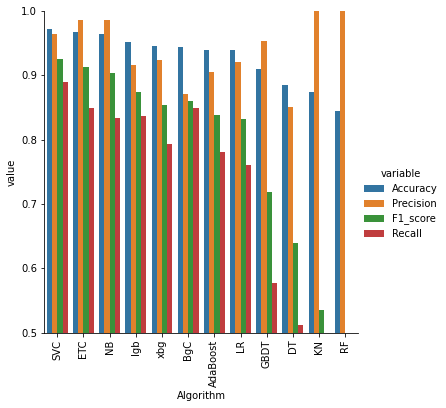

In [167]:
sns.catplot(x = 'Algorithm', y = 'value', hue = 'variable', data = performance_df1, kind ='bar', height = 5)
plt.ylim(0.5,1.0)
plt.xticks(rotation = 'vertical')
plt.show()

In [168]:
svc.fit(X_train_features, y_train) 

SVC(gamma=1.0, kernel='sigmoid')

In [169]:
prediction_on_test_data = svc.predict(X_test_features)
accuracy_on_test_data = accuracy_score(y_test, prediction_on_test_data)

In [170]:
print('Accuracy on test data : ', accuracy_on_test_data)

Accuracy on test data :  0.9716139497161395


In [195]:
#Transforming input
x = transform_text('Bwelani kunyumba muzatenge ndalama zanu')

input_mail = [x]

input_data_features = feature_extraction.transform(input_mail)

#Making prediction

prediction = svc.predict(input_data_features)

print(prediction)

if prediction[0] == 0:
    print('legit')
else:
    print('smishing')

[0]
legit


In [173]:
import pickle
pickle.dump(feature_extraction, open('vectorizer.pkl', 'wb'))
pickle.dump(svc, open('model.pkl', 'wb'))